In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import glob
import matplotlib.pyplot as plt
import random
import torch
from torchvision import datasets,transforms,models
from torch.utils.data import Dataset,DataLoader
from PIL import Image
import sys
import torch.optim as optim
import xmltodict
from collections import Counter
import matplotlib.patches as mpatches

In [2]:
print('hey')

hey


In [3]:
img_names=[] 
xml_names=[] 
for dirname, _, filenames in os.walk('/Users/kush/Desktop/ML002/Mask_dataset/PPE-Detection-uGdxSim_copy'):
    for filename in filenames:
        if os.path.join(dirname, filename)[-3:]=="png":
            img_names.append(filename)
        elif os.path.join(dirname, filename)[-3:]=="xml":
            xml_names.append(filename)

In [4]:
path_annotations="/Users/kush/Desktop/ML002/Mask_dataset/PPE-Detection-uGdxSim/annotations/" 
listing=[]
for i in img_names[:]:
    with open(path_annotations+i[:-4]+".xml") as fd:
        doc=xmltodict.parse(fd.read())
    temp=doc["annotation"]["object"]
    if type(temp)==list:
        for i in range(len(temp)):
            listing.append(temp[i]["name"])
    else:
        listing.append(temp["name"])
        

Items = Counter(listing).keys()
values = Counter(listing).values()
print(Items,'\n',values)

dict_keys(['with_mask', 'mask_weared_incorrect', 'without_mask']) 
 dict_values([3232, 123, 717])


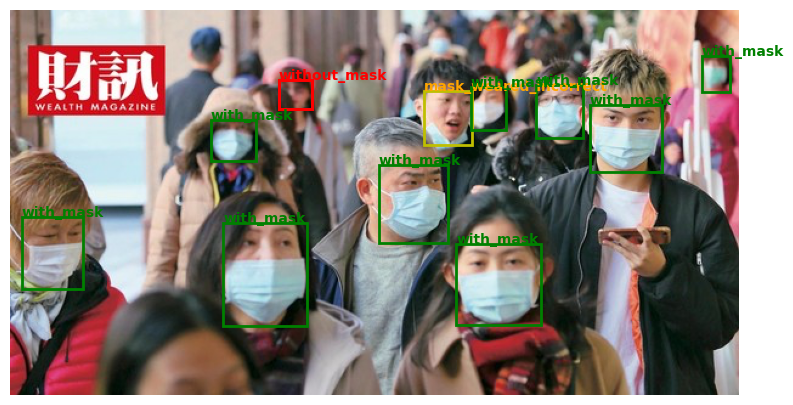

In [5]:
path_image="/Users/kush/Desktop/ML002/Mask_dataset/PPE-Detection-uGdxSim/images_main/"  
def face_cas(img): 
    with open(path_annotations+img[:-4]+".xml") as fd:
        doc=xmltodict.parse(fd.read())
    image=plt.imread(os.path.join(path_image+img))
    fig,ax=plt.subplots(1)
    ax.axis("off")
    fig.set_size_inches(10,5)
    temp=doc["annotation"]["object"]
    if type(temp)==list:
        for i in range(len(temp)):
            ###with_mask
            if temp[i]["name"]=="with_mask":
                x,y,w,h=list(map(int,temp[i]["bndbox"].values()))
                mpatch=mpatches.Rectangle((x,y),w-x,h-y,linewidth=1, edgecolor='g',facecolor="none",lw=2,)
                ax.add_patch(mpatch)
                rx, ry = mpatch.get_xy()
                ax.annotate("with_mask", (rx, ry), color='green', weight='bold', fontsize=10, ha='left', va='baseline')
            ###without_mask
            if temp[i]["name"]=="without_mask":
                x,y,w,h=list(map(int,temp[i]["bndbox"].values()))     
                mpatch=mpatches.Rectangle((x,y),w-x,h-y,linewidth=1, edgecolor='r',facecolor="none",lw=2,)
                ax.add_patch(mpatch)
                rx, ry = mpatch.get_xy()
                ax.annotate("without_mask", (rx, ry), color='red', weight='bold', fontsize=10, ha='left', va='baseline')
            ###mask_weared_incorrect
            if temp[i]["name"]=="mask_weared_incorrect":
                x,y,w,h=list(map(int,temp[i]["bndbox"].values()))
                mpatch=mpatches.Rectangle((x,y),w-x,h-y,linewidth=1, edgecolor='y',facecolor="none",lw=2,)
                ax.add_patch(mpatch)
                rx, ry = mpatch.get_xy()
                ax.annotate("mask_weared_incorrect", (rx, ry), color='orange', weight='bold', fontsize=10, ha='left', va='baseline')
    else:
        x,y,w,h=list(map(int,temp["bndbox"].values()))
        edgecolor={"with_mask":"g","without_mask":"r","mask_weared_incorrect":"y"}
        mpatch=mpatches.Rectangle((x,y),w-x,h-y,linewidth=1, edgecolor=edgecolor[temp["name"]],facecolor="none",)
    ax.imshow(image)
    ax.add_patch(mpatch)

fun_images = img_names.copy()
random.seed(42)
for i in range(1):
    face_cas(fun_images[i])

In [6]:
options={"with_mask":0,"without_mask":1,"mask_weared_incorrect":2} 

In [8]:
def dataset_creation(image_list): 
    image_tensor=[]
    label_tensor=[]
    for i,j in enumerate(image_list):
        with open(path_annotations+j[:-4]+".xml") as fd:
            doc=xmltodict.parse(fd.read())
        if type(doc["annotation"]["object"])!=list:
            temp=doc["annotation"]["object"]
            x,y,w,h=list(map(int,temp["bndbox"].values()))
            label=options[temp["name"]]
            image=transforms.functional.crop(Image.open(path_image+j).convert("RGB"), y,x,h-y,w-x)
            image_tensor.append(my_transform(image))
            label_tensor.append(torch.tensor(label))
        else:
            temp=doc["annotation"]["object"]
            for k in range(len(temp)):
                x,y,w,h=list(map(int,temp[k]["bndbox"].values()))
                label=options[temp[k]["name"]]
                image=transforms.functional.crop(Image.open(path_image+j).convert("RGB"),y,x,h-y,w-x)
                image_tensor.append(my_transform(image))
                label_tensor.append(torch.tensor(label))
                
    final_dataset=[[k,l] for k,l in zip(image_tensor,label_tensor)]
    return tuple(final_dataset)


my_transform=transforms.Compose([transforms.Resize((226,226)),
                                 transforms.ToTensor()])

mydataset=dataset_creation(img_names)

In [9]:
mydataset[10:]

([tensor([[[0.5686, 0.5686, 0.5686,  ..., 0.6078, 0.6078, 0.6078],
           [0.5686, 0.5686, 0.5686,  ..., 0.6078, 0.6078, 0.6078],
           [0.5686, 0.5686, 0.5686,  ..., 0.6078, 0.6078, 0.6078],
           ...,
           [0.1451, 0.1451, 0.1451,  ..., 0.0471, 0.0471, 0.0471],
           [0.1451, 0.1451, 0.1451,  ..., 0.0471, 0.0471, 0.0471],
           [0.1451, 0.1451, 0.1451,  ..., 0.0471, 0.0471, 0.0471]],
  
          [[0.3804, 0.3804, 0.3804,  ..., 0.2745, 0.2745, 0.2745],
           [0.3804, 0.3804, 0.3804,  ..., 0.2745, 0.2745, 0.2745],
           [0.3804, 0.3804, 0.3804,  ..., 0.2745, 0.2745, 0.2745],
           ...,
           [0.1451, 0.1451, 0.1451,  ..., 0.0706, 0.0706, 0.0706],
           [0.1451, 0.1451, 0.1451,  ..., 0.0706, 0.0706, 0.0706],
           [0.1451, 0.1451, 0.1451,  ..., 0.0706, 0.0706, 0.0706]],
  
          [[0.2902, 0.2902, 0.2902,  ..., 0.2549, 0.2549, 0.2549],
           [0.2902, 0.2902, 0.2902,  ..., 0.2549, 0.2549, 0.2549],
           [0.2902, 0.